In [1]:
import requests
import pandas as pd
import io

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from IPython.display import HTML

import geopandas as gpd
import contextily as ctx

import urllib

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.graph_objects as go
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings("ignore")


In [109]:
df = pd.read_csv(filepath_or_buffer = "C:/Users/Benjamin/Desktop/IWEPS/Data/Data_intermediaire/Gini_carte.csv")
# df

In [140]:
map_path = "C:/Users/Benjamin/Desktop/IWEPS/Data/Data_intermediaire/" + "europeUltra.json"
map_path = "C:/Users/Benjamin/Desktop/IWEPS/Data/Data_intermediaire/" + "world-administrative-boundaries.geojson"

sf = gpd.read_file(map_path)
sf.head(3)

,geo_point_2d,iso3,status,color_code,name,continent,region,iso_3166_1_alpha_2_codes,french_short,geometry
0,"{'lon': 32.38621827281175, 'lat': 1.2799634451...",UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111..."
1,"{'lon': 63.169364370421164, 'lat': 41.75044402...",UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205..."
2,"{'lon': -8.150578960214018, 'lat': 53.17638162...",IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53..."


In [165]:
sf = sf[(sf["continent"] == "Europe") & (sf["status"] == "Member State") & (sf["name"] != "Russian Federation")]

In [166]:
sf = sf.rename(columns = {"iso_3166_1_alpha_2_codes" : "id" })

In [167]:
sf.head(3)

,geo_point_2d,iso3,status,color_code,name,continent,region,id,french_short,geometry
2,"{'lon': -8.150578960214018, 'lat': 53.17638162...",IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53..."
6,"{'lon': -3.649564960428935, 'lat': 40.22682992...",ESP,Member State,ESP,Spain,Europe,Southern Europe,ES,Espagne,"MULTIPOLYGON (((-17.91125 27.77375, -17.96389 ..."
16,"{'lon': 8.234429172288662, 'lat': 46.802569376...",CHE,Member State,CHE,Switzerland,Europe,Western Europe,CH,Suisse,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ..."


In [168]:
# type(sf["id"][0])
# type(df["Pays"][0])

In [171]:
# sf

Tout d'abord l'Europe et ses pays !' :


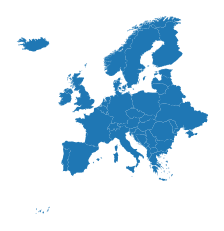

In [172]:
ax = sf.plot()
ax.set_axis_off()
print("Tout d'abord l'Europe et ses pays !' :")

In [173]:
df_pays = sf.merge(df, how = "left", left_on = "id", right_on = "Pays")

In [174]:
df_pays_simple = df_pays.loc[(df_pays["id"] != 'RU')]

In [175]:
df_pays_simple[['Gini_modif']] = df_pays_simple[['Gini']].fillna(0)

Text(0.5, 1.0, 'Première carte de Gini !')

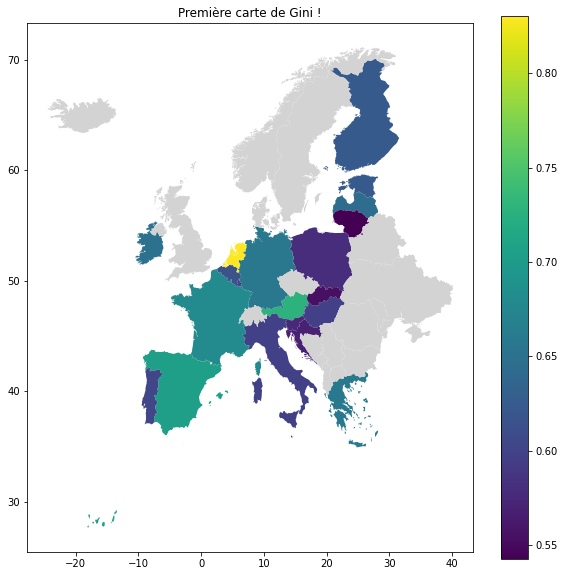

In [176]:
df_pays_simple["centre_pays"] = df_pays_simple.centroid


fig,ax = plt.subplots(figsize=(10, 10))
df_pays_simple.plot(ax = ax, column = "Gini", legend=True,  missing_kwds= dict(color = "lightgrey",))
plt.title("Première carte de Gini !")

In [177]:
from math import isnan

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


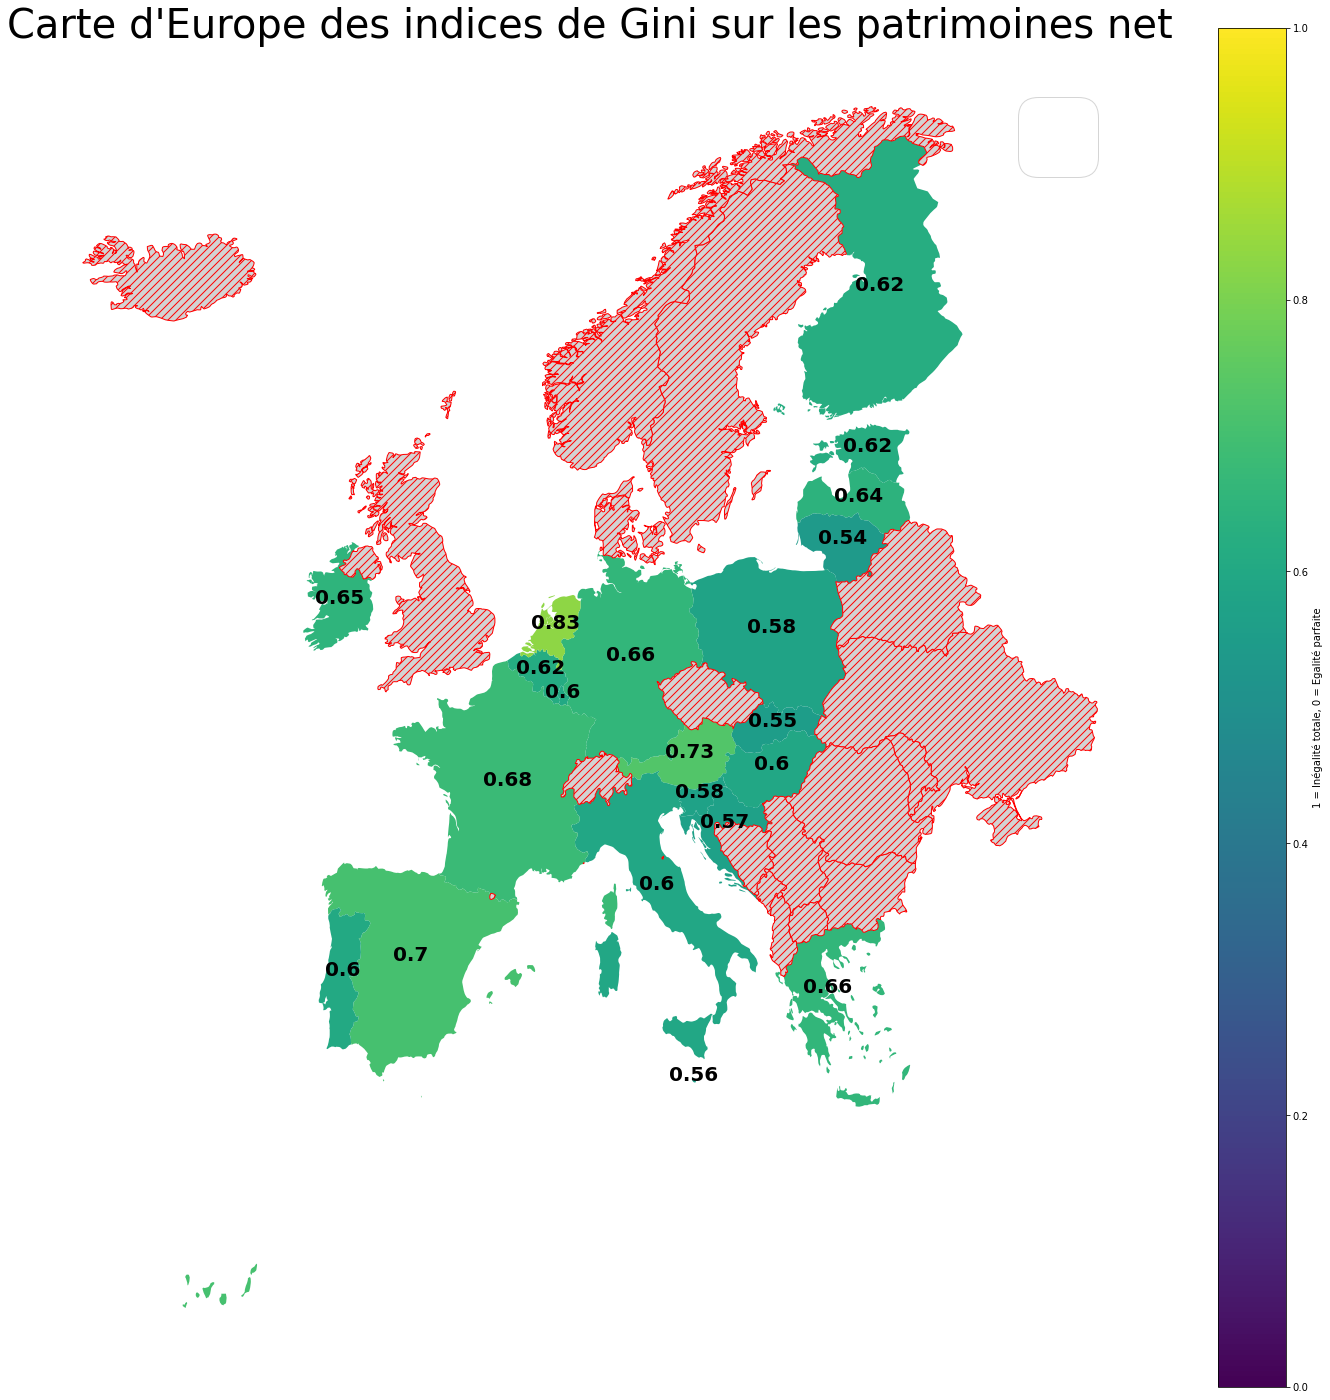

In [190]:
fig,ax = plt.subplots(figsize=(25, 25))
df_pays_simple.plot(ax = ax, column = "Gini",
             legend=True,
            figsize=(10, 10),
            missing_kwds={
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values",
            },
             colormap = "viridis",
            vmin = 0, vmax = 1,
            legend_kwds={"label": "1 = Inégalité totale, 0 = Egalité parfaite", "orientation": "vertical"}
                   )


for num_ligne in range(len(df_pays_simple)) :    
    ligne = df_pays_simple.iloc[num_ligne] # On répupère la ligne
    if not isnan(ligne["Gini"]) : #Uniquement si l'indice de Gini n'est pas NAN
        x = ligne['centre_pays'].x
        y = ligne['centre_pays'].y
        ax.annotate(np.round(ligne["Gini"], 2), xy = (x, y), xytext = (0, 0),
                    textcoords="offset points", ha='center', color='black', weight='bold', fontsize=20)

ax.set_axis_off()
# plt.colorbar(scatter, ax=ax, shrink=0.5)

# plt.legend(fontsize = 100)

plt.title("Carte d'Europe des indices de Gini sur les patrimoines net", fontsize = 40)
# ax.tick_params(labelsize=1)

ax

plt.savefig("C:/Users/Benjamin/Desktop/IWEPS/Sorties/Carte_Gini_pat_net.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [47]:
fig,ax = plt.figure(figsize=(12,6))


df_pays.plot(ax = ax, column = "Gini", legend=True,  missing_kwds= dict(color = "lightgrey",))


for num_ligne in range(len(df_pays)) :    
    ligne = df_pays.iloc[num_ligne] # On répupère la ligne
    if not isnan(ligne["Gini"]) : #Uniquement si l'indice de Gini n'est pas NAN
        x = ligne['centre_pays'].x
        y = ligne['centre_pays'].y
        ax.annotate(np.round(ligne["Gini"], 2), xy = (x, y), xytext = (0, 0), textcoords="offset points", ha='center', color='white')

ax.set_axis_off()
ax
plt.show()

TypeError: cannot unpack non-iterable Figure object

<Figure size 864x432 with 0 Axes>